## Data Wrangling

**Data collection:** The TDocs of a particular 3GPP meeting can be donwloaded, unzipped and extracted by using the [script](https://github.com/sanjeewaherath1/Bootcamp/blob/0757a18a47672a4a059c28bcb82a9c1a9d7fb14b/capstone/Scrap3GPPTdocs_v4.py). The extracted document is a word file with text and others such as equations, images, tables etc.

**Data cleaning** The word document need to be further process in order to extract the text data. Following script extract text from the word document to be used further processing to generate the text summary.  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installing docx2txt package

In [2]:
pip install docx2txt

  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3959 sha256=842f1f1aa99bc90da6515d791ad11766c20a76dc9a28fb261a5d1f0328a3693f
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


In [3]:
import docx2txt

In [4]:
input_text_R1_2405962 = docx2txt.process("/content/drive/MyDrive/Notes_Bootcamp/Assignments/Capstone Project/DataSet/Download_118/Docs/R1-2405962_Other aspects of AIML Model and Data.docx")
# print(input_text_R1_2405962)
input_text_R1_2405963 = docx2txt.process("/content/drive/MyDrive/Notes_Bootcamp/Assignments/Capstone Project/DataSet/Download_118/Docs/R1-2405963_AIML for BM.docx")
# print(input_text_R1_2405963)

In [ ]:
print(f"length of dataset R1_2405962 in characters:  {len(input_text_R1_2405962)}")
print(f"length of dataset R1_2405963 in characters:  {len(input_text_R1_2405963)}")

length of dataset R1_2405962 in characters:  16551
length of dataset R1_2405963 in characters:  11281


In [ ]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(input_text_R1_2405962)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

	
 #(),-./0123456789:;ABCDEFGHILMNOPRSTUVWX[]_abcdefghijklmnopqrstuvwxyz §·’“”…□
80


In [ ]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(input_text_R1_2405963)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

	
 #%(),-./0123456789:=ABCDEFGHIKLMNOPRSTUWX[]_abcdefghijklmnopqrstuvwxyz“”
75


In [ ]:
# print(chars)

In [ ]:
print(input_text_R1_2405963[:1000])

3GPP TSG RAN WG1 #118	R1-2405963

Maastricht, NL, 19 Aug 2024 - 23 Aug 2024



Agenda item:		9.1.1

	Source:	Tejas Networks

Title:	AI/ML for Beam Management

Document for:		Discussion and Decision

Introduction

RAN #102 meeting approved the Rel-19 WI on AI/ML for NR Air Interface [RP-234039] and RAN #103 meeting provided the revised WID [RP-240774], based on the AI/ML techniques to NR air interface that has been studied in FS_NR_AIML_Air [TR 38.843]. In this contribution, we discuss the enhancements related to AI/ML for beam management and the work item objectives related to the beam management use case are as follows, 

Objectives in RP-234039

Provide specification support for the following aspects:

AI/ML general framework for one-sided AI/ML models within the realm of what has been studied in the FS_NR_AIML_Air project [RAN2]:

Signalling and protocol aspects of Life Cycle Management (LCM) enabling functionality and model (if justified) selection, activation, deactivation, switch

# Read the TDoc list
In every meeting, the Docs folder has an excel sheet with all the TDocs lists along with the TDoc number, title, source (the company or 3GPP official), Type, agenda item, agenda item description, TDoc status etc.   

In [5]:
import pandas as pd
tdoc_list = pd.read_excel('/content/drive/MyDrive/Notes_Bootcamp/Assignments/Capstone Project/DataSet/Download_118/TDoc_List_Meeting_RAN1#118.xlsx')

In [6]:
tdoc_list.head()

,TDoc,Title,Source,Contact,Contact ID,Type,For,Abstract,Secretary Remarks,Agenda item sort order,...,UICC,ME,RAN,CN,Clauses Affected,Reply to,To,Cc,Original LS,Reply in
0,R1-2405780,Draft Agenda of RAN1#118 meeting,RAN1 Chair,Patrick Merias,52292,agenda,Approval,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,R1-2405781,Highlights from RAN#104,RAN1 Chair,Patrick Merias,52292,other,Information,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R1-2405782,Report of RAN1#117 meeting,ETSI MCC,Patrick Merias,52292,report,Approval,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R1-2405783,"RAN1#118 Meeting Timelines, Scope, Process","RAN1 Chair, ETSI MCC",Patrick Merias,52292,other,Information,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R1-2405784,LS on RACH during uplink transmission extension,"RAN2, Samsung",Patrick Merias,52292,LS in,Discussion,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,RAN1,RAN4,R2-2405766,NaN


List all the column names

In [7]:
tdoc_list.columns

Index(['TDoc', 'Title', 'Source', 'Contact', 'Contact ID', 'Type', 'For',
       'Abstract', 'Secretary Remarks', 'Agenda item sort order',
       'Agenda item', 'Agenda item description',
       'TDoc sort order within agenda item', 'TDoc Status', 'Reservation date',
       'Uploaded', 'Is revision of', 'Revised to', 'Release', 'Spec',
       'Version', 'Related WIs', 'CR', 'CR revision', 'CR category',
       'TSG CR Pack', 'UICC', 'ME', 'RAN', 'CN', 'Clauses Affected',
       'Reply to', 'To', 'Cc', 'Original LS', 'Reply in'],
      dtype='object')

In [8]:
print(f"# Agenda item: {len(tdoc_list['Agenda item'].unique())}, # Agenda item description {len(tdoc_list['Agenda item description'].unique())}")

# Agenda item: 52, # Agenda item description 52


Create a dictionary from the agenda items vs agenda item description in the meeting

In [9]:
agenda_items = tdoc_list['Agenda item'].unique()
agenda_item_description = tdoc_list['Agenda item description'].unique()
agenda_dictionary = dict(zip(agenda_items, agenda_item_description))
print(agenda_dictionary)

{'2': 'Approval of Agenda', '3': 'Highlights from RAN plenary', '4': 'Approval of Minutes from previous meetings', '5': 'Incoming Liaison Statements', '9.4.1.1': 'Evaluation assumptions and results', '9.4.1.2': 'Ambient IoT device architectures', '9.4.2.1': 'General aspects of physical layer design', '9.4.2.2': 'Frame structure and timing aspects', '9.4.2.3': 'Downlink and uplink channel/signal aspects', '9.4.2.4': 'Waveform characteristics of carrier-wave provided externally to the Ambient IoT device', '9.6.1': 'LP-WUS and LP-SS design', '9.6.2': 'LP-WUS operation in IDLE/INACTIVE modes', '9.1.1': 'Specification support for beam management', '9.1.3.2': 'CSI compression', '9.1.3.3': 'Other aspects of AI/ML model and data', '9.5.1': 'On-demand SSB SCell operation', '9.5.2': 'On-demand SIB1 for idle/inactive mode UEs', '9.5.3': 'Adaptation of common signal/channel transmissions', '9.2.1': 'Enhancements for UE-initiated/event-driven beam management', '9.3.1': 'SBFD TX/RX/measurement proce

List all the TDocs in Agenda Item 9.1.1 in meeting 118

In [10]:
tdocs_agenda911 = tdoc_list[['TDoc', 'Title', 'Source', 'Type', 'For',
            'Agenda item', 'Agenda item description',
       'TDoc Status', 'Uploaded', 'Is revision of', 'Revised to', 'Release', 'Spec',
       'Version', 'Related WIs', 'CR', 'CR revision', 'CR category',
       'RAN']][tdoc_list['Agenda item'] == '9.1.1']

In [11]:
tdocs_agenda911.head()

,TDoc,Title,Source,Type,For,Agenda item,Agenda item description,TDoc Status,Uploaded,Is revision of,Revised to,Release,Spec,Version,Related WIs,CR,CR revision,CR category,RAN
28,R1-2405808,Discussion on specification support for AI/ML-...,FUTUREWEI,discussion,Decision,9.1.1,Specification support for beam management,not treated,2024-08-09 15:03:28.643,NaN,NaN,Rel-19,NaN,NaN,NR_AIML_air-Core,NaN,NaN,NaN,NaN
119,R1-2405899,Discussion on AIML for beam management,Spreadtrum Communications,discussion,Decision,9.1.1,Specification support for beam management,not treated,2024-08-09 11:44:19.497,NaN,NaN,Rel-19,NaN,NaN,NR_AIML_air-Core,NaN,NaN,NaN,NaN
164,R1-2405944,Specification Support for AI/ML for Beam Manag...,Kyocera,discussion,Decision,9.1.1,Specification support for beam management,not treated,2024-08-08 16:13:37.767,NaN,NaN,Rel-19,NaN,NaN,NR_AIML_air-Core,NaN,NaN,NaN,NaN
170,R1-2405950,AI/ML based Beam Management,Google,discussion,Decision,9.1.1,Specification support for beam management,not treated,2024-08-09 14:15:59.903,NaN,NaN,Rel-19,NaN,NaN,NR_AIML_air-Core,NaN,NaN,NaN,NaN
183,R1-2405963,AI/ML for Beam Management,Tejas Networks Limited,discussion,Decision,9.1.1,Specification support for beam management,not treated,2024-08-07 10:45:52.833,NaN,NaN,Rel-19,NaN,NaN,NR_AIML_air-Core,NaN,NaN,NaN,NaN


Count the number of TDocs in meeting 118

In [12]:
tdoc_list['TDoc'].count()

1800

Count the number of TDocs in Agenda Item 9.1.1 in meeting 118

In [13]:
tdocs_agenda911['TDoc'].count()

48

Out of the 1800 TDocs submitted to the meeting 118, agenda item 9.1.1: Discussion on AIML for beam management has 48 TDocs

Count the number of TDocs and source (i.e., company) in each agenda item in meeting 118

In [14]:
tdoc_list.groupby('Agenda item').count()[['TDoc', 'Source']]

,TDoc,Source
Agenda item,,
2,3,3
3,1,1
4,1,1
5,83,83
7,114,114
8,6,6
8.1,323,323
8.2,6,6
8.2.1,10,10


In [16]:
agenda_item_vs_tdoc_count = tdoc_list.groupby('Agenda item').count()[['TDoc']]

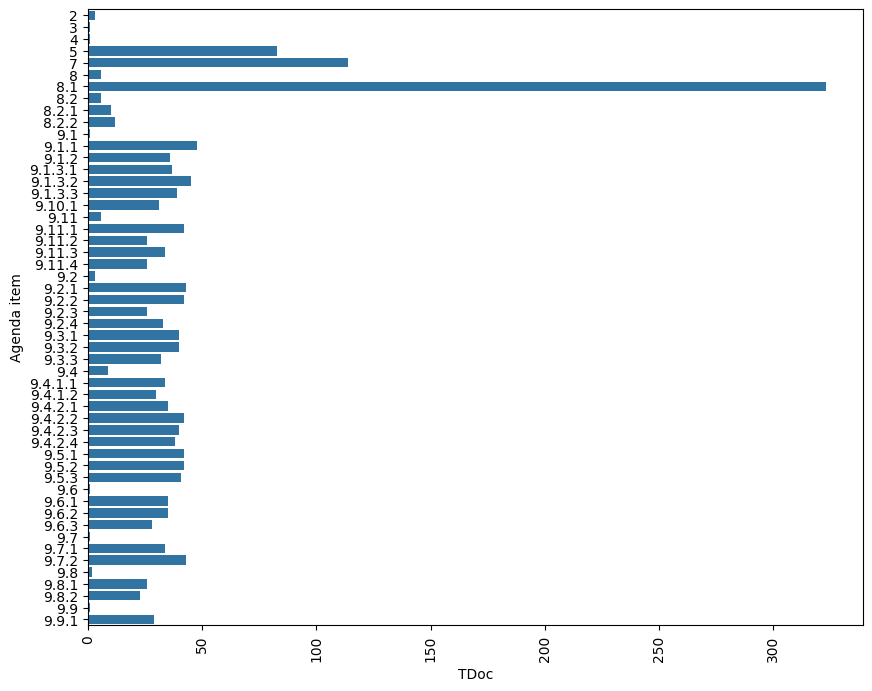

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.barplot(data=agenda_item_vs_tdoc_count, y='Agenda item', x='TDoc', orient='h')
plt.xticks(rotation=90);

In [19]:
agenda_dictionary['9.1']

'Artificial Intelligence (AI)/Machine Learning (ML) for NR Air Interface (NR_AIML_Air)'

#Discussion - The meeting #118
- There are 1800 TDocs submitted by companies on 52 different agenda items.
- TDoc list contains the data about the TDoc submitted to the meeting including TDoc number, TDoc Title, The Source (eg. company submitting the TDoc), the Agenda details (agenda item number, description)
- This data can be ustilize to obtain useful information regarding the meeting
- The content of each TDoc can be downloaded/unzipped and extracted from the 3GPP ftp server. The python [script](https://github.com/sanjeewaherath1/Bootcamp/blob/0757a18a47672a4a059c28bcb82a9c1a9d7fb14b/capstone/Scrap3GPPTdocs_v4.py) can be used to get the TDoc content downloaded.
- Python library such as docx2txt can be used to extract the text data from the TDoc which can be processed for summary generation
